In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
pd.options.display.max_columns = 10000

In [2]:
#read in new df from preprocessing
df = pd.read_csv('preprocessed_letterboxd.csv')

In [3]:
df.head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre,year_isna,animation,horror,scifi,thriller,war
0,Get Out,2017.0,Jordan Peele,104,605132,261668,4.1,647,1560,1001,5727,5821,34069,45053,136842,65726,110264,horror,False,0,1,0,0,0
1,Zombieland,2009.0,Ruben Fleischer,88,339357,77110,3.6,477,1384,1353,6280,9055,37228,43168,53117,10931,11907,horror,False,0,1,0,0,0
2,Suspiria,2018.0,Luca Guadagnino,152,122728,37820,3.7,611,1253,1266,4151,4844,12282,15033,25865,13732,12889,horror,False,0,1,0,0,0
3,Halloween,1978.0,John Carpenter,91,212751,59124,4.0,204,700,602,3003,3627,15715,17598,35627,14882,29077,horror,False,0,1,0,0,0
4,Rosemary's Baby,1968.0,Roman Polanski,137,158689,46272,4.2,156,372,253,1326,1412,6933,9562,27455,18616,24435,horror,False,0,1,0,0,0


In [4]:
df.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre,year_isna,animation,horror,scifi,thriller,war
count,40018,40018.000000,40018,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018,40018,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000
unique,30378,NaN,16293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,NaN,NaN,NaN,NaN,NaN
top,Frankenstein,NaN,directorNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,thriller,False,NaN,NaN,NaN,NaN,NaN
freq,18,NaN,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12836,39998,NaN,NaN,NaN,NaN,NaN
mean,NaN,1993.910465,NaN,80.726548,6826.995702,1316.224424,2.972707,54.423484,111.778300,105.667125,293.829577,309.652281,720.899595,614.732420,820.867235,299.167150,403.334599,NaN,NaN,0.202984,0.276176,0.145609,0.320756,0.054475
std,NaN,50.558016,NaN,42.044645,34009.245241,9260.254979,0.473895,329.131089,570.423667,474.780097,1275.813010,1253.326690,3208.731177,2979.839044,5347.700701,2518.510737,4304.396370,NaN,NaN,0.402225,0.447110,0.352719,0.466773,0.226956
min,NaN,0.000000,NaN,1.000000,33.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1982.000000,NaN,73.000000,109.250000,11.000000,2.700000,1.000000,2.000000,3.000000,8.000000,8.000000,13.000000,7.000000,4.000000,1.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,2004.000000,NaN,90.000000,288.000000,34.000000,3.000000,4.000000,8.000000,9.000000,20.000000,21.000000,36.000000,22.000000,15.000000,3.000000,4.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,2014.000000,NaN,100.000000,1271.000000,165.000000,3.300000,16.000000,31.000000,33.000000,82.000000,90.000000,172.000000,113.000000,87.000000,18.000000,22.000000,NaN,NaN,0.000000,1.000000,0.000000,1.000000,0.000000


In [5]:
df.isnull().sum()

title              0
year               0
director           0
running_time       0
views              0
likes              0
avg_rating         0
half_star          0
one_star           0
one_half_star      0
two_star           0
two_half_star      0
three_star         0
three_half_star    0
four_star          0
four_half_star     0
five_star          0
genre              0
year_isna          0
animation          0
horror             0
scifi              0
thriller           0
war                0
dtype: int64

In [108]:
df.dtypes

title               object
year               float64
director            object
running_time         int64
views                int64
likes                int64
avg_rating         float64
half_star            int64
one_star             int64
one_half_star        int64
two_star             int64
two_half_star        int64
three_star           int64
three_half_star      int64
four_star            int64
four_half_star       int64
five_star            int64
genre               object
year_isna             bool
animation            int64
horror               int64
scifi                int64
thriller             int64
war                  int64
dtype: object

In [6]:
print(df[df['avg_rating'] == df['avg_rating'].min()])

                          title    year            director  running_time  \
761    Potato Salad: Don't Ask!  2015.0  Michael David Pate            81   
16432      Dragonball Evolution  2009.0          James Wong            85   
28843      Dragonball Evolution  2009.0          James Wong            85   
39618                Foodfight!  2012.0   Lawrence Kasanoff            87   

       views  likes  avg_rating  half_star  one_star  one_half_star  two_star  \
761     1296     18         0.9        770       148             41        24   
16432  25282    350         0.9       9251      3144            831       722   
28843  25297    349         0.9       9259      3144            831       722   
39618   6828    437         0.9       3533       608            101        65   

       two_half_star  three_star  three_half_star  four_star  four_half_star  \
761               11           6                3          4               0   
16432            241         211               4

In [8]:
print(df[df['avg_rating'] == df['avg_rating'].max()])

              title    year             director  running_time   views  \
16879      Parasite  2019.0         Bong Joon-ho           133  539266   
39651  Cowboy Bebop  1998.0  Shinichiro Watanabe           625    7527   

        likes  avg_rating  half_star  one_star  one_half_star  two_star  \
16879  283450         4.6        308       427            289      1266   
39651    3531         4.6         15         9              5        10   

       two_half_star  three_star  three_half_star  four_star  four_half_star  \
16879           1640        8667            14524      69003           90025   
39651             13          99              153        655             884   

       five_star      genre  year_isna  animation  horror  scifi  thriller  \
16879     243931   thriller      False          0       0      0         1   
39651       3039  animation      False          1       0      0         0   

       war  
16879    0  
39651    0  


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


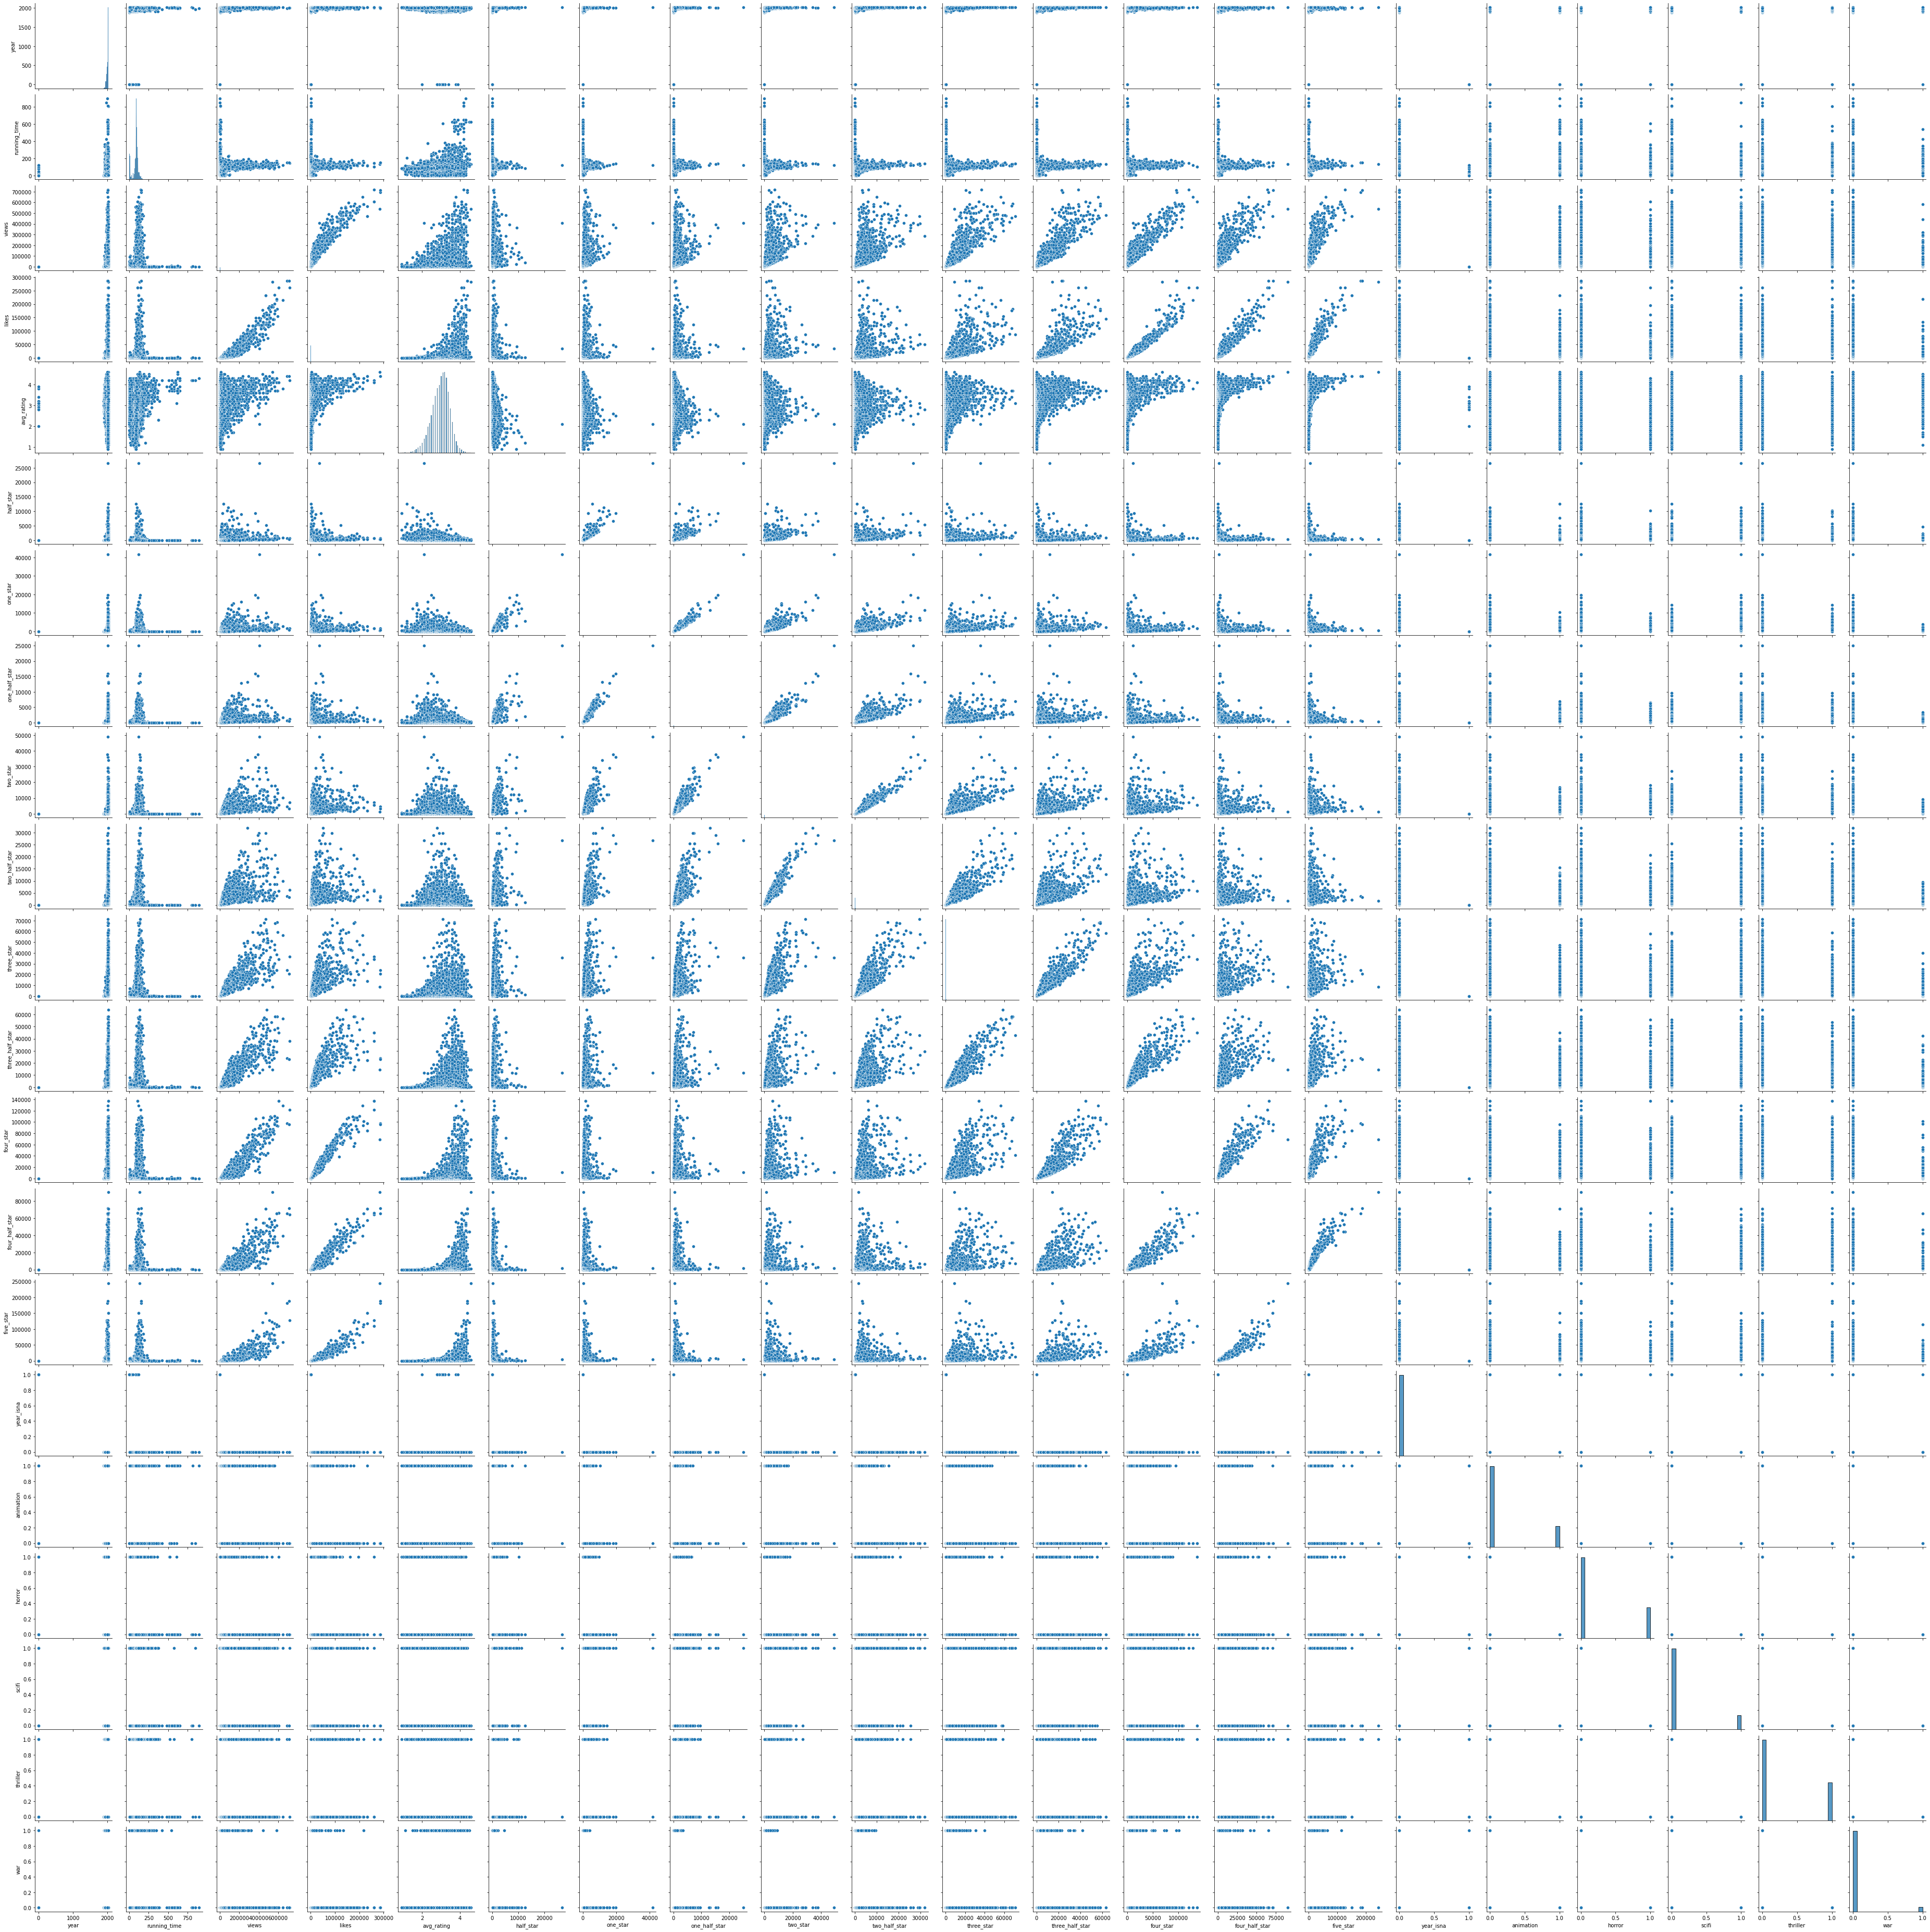

In [80]:
sns.pairplot(df)

In [9]:
# likes feature model training

In [96]:
model = LinearRegression()
X = df['likes']
y = df['avg_rating']
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)

In [100]:
X_train_true = X_train_true.values.reshape(-1,1)
y_train_true = y_train_true.values.reshape(-1,1)
X_test_true = X_test_true.values.reshape(-1,1)

In [101]:
model.fit(X_train_true, y_train_true)
y_test_pred = model.predict(X_test_true)
model.score(X_train_true, y_train_true)

LinearRegression()

In [104]:
model.score(X_test_true, y_test_true)

0.038840106301076927

In [40]:
# predictive power for this feature
model.coef_

array([[9.99113996e-06]])

In [20]:
# pd.Series(y_test_pred).unique()

In [106]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.4675207942245636

In [53]:
# y_error = y_test_pred - y_test_true 
# y_error

In [54]:
# standard_error = ((y_error**2).mean())**0.5
# standard_error

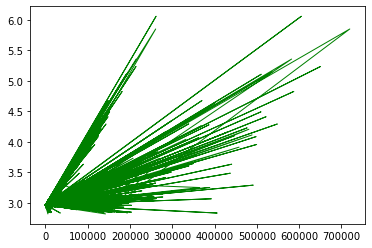

In [57]:
plt.plot(X_test_true, y_test_pred, color='green',linewidth=1)
plt.show()

<AxesSubplot:xlabel='likes', ylabel='avg_rating'>

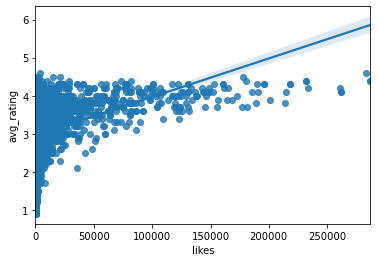

In [58]:
sns.regplot(x="likes", y="avg_rating", data=df)

In [ ]:
#views

In [109]:
X = df['views']
y = df['avg_rating']
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)
X_train_true = X_train_true.values.reshape(-1,1)
y_train_true = y_train_true.values.reshape(-1,1)
X_test_true = X_test_true.values.reshape(-1,1)
model = LinearRegression()
model.fit(X_train_true, y_train_true)
y_test_pred = model.predict(X_test_true)

In [110]:
model.score(X_train_true, y_train_true)

0.027906168426007127

In [111]:
model.score(X_test_true, y_test_true)

0.027246750952217735

In [74]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.47033192293075016

<AxesSubplot:xlabel='views', ylabel='avg_rating'>

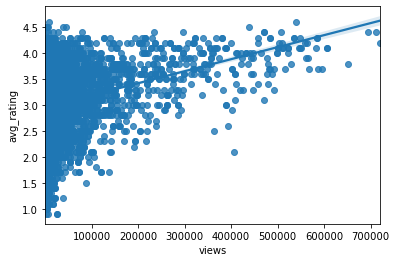

In [75]:
sns.regplot(x=X, y=y, data=df)

In [ ]:
#running time

In [112]:
X = df['running_time']
y = df['avg_rating']
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)
X_train_true = X_train_true.values.reshape(-1,1)
y_train_true = y_train_true.values.reshape(-1,1)
X_test_true = X_test_true.values.reshape(-1,1)
model = LinearRegression()
model.fit(X_train_true, y_train_true)
y_test_pred = model.predict(X_test_true)

In [113]:
model.score(X_train_true, y_train_true)

0.009326616915135144

In [114]:
model.score(X_test_true, y_test_true)

0.013386327785223529

In [115]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.4736708692297187

<AxesSubplot:xlabel='running_time', ylabel='avg_rating'>

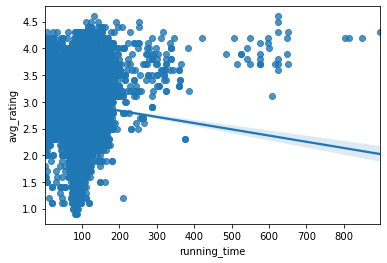

In [79]:
sns.regplot(x=X, y=y, data=df)

In [ ]:
#half star

In [190]:
X = df['running_time']
y = df['avg_rating']
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)
X_train_true = X_train_true.values.reshape(-1,1)
y_train_true = y_train_true.values.reshape(-1,1)
X_test_true = X_test_true.values.reshape(-1,1)
model = LinearRegression()
model.fit(X_train_true, y_train_true)
y_test_pred = model.predict(X_test_true)

In [191]:
model.score(X_train_true, y_train_true)

0.009326616915135144

In [192]:
model.score(X_test_true, y_test_true)

0.013386327785223529

In [193]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.4736708692297187

<AxesSubplot:xlabel='running_time', ylabel='avg_rating'>

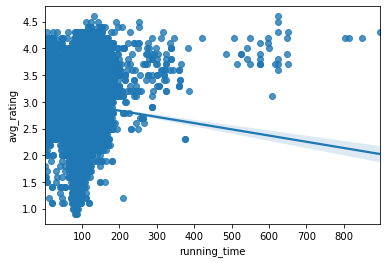

In [194]:
sns.regplot(x=X, y=y, data=df)

In [108]:
#likes and views

In [116]:
X = np.asarray(df[['views', 'likes']])
y = np.asarray(df['avg_rating'])
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)
model.fit(X_train_true, y_train_true)
model.score(X_train_true, y_train_true)

In [121]:
model.score(X_test_true, y_test_true)

0.041397519544677075

In [64]:
y_test_pred = model.predict(X_test_true)

In [65]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.4668984002461756

In [52]:
#likes, views and running time

In [122]:
X = np.asarray(df[['views', 'likes', 'running_time' ]])
y = np.asarray(df['avg_rating'])
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)
model.fit(X_train_true, y_train_true)
model.score(X_train_true, y_train_true)

In [126]:
model.score(X_test_true, y_test_true)

0.059547456008833155

In [126]:
y_test_pred = model.predict(X_test_true)

In [127]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.4624572096906384

In [ ]:
# likes, views, running time, five star

In [127]:
X = np.asarray(df[['views', 'likes', 'running_time', 'five_star' ]])
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)
model.fit(X_train_true, y_train_true)
model.score(X_train_true, y_train_true)

In [12]:
model.score(X_test_true, y_test_true)

0.05776980324986636

In [13]:
y_test_pred = model.predict(X_test_true)

In [14]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.46289407395709914

In [ ]:
#accuracy went down when five stars was added 

In [ ]:
# views, likes, running time and year

In [131]:
X = np.asarray(df[['views', 'likes', 'running_time', 'year' ]])
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)
model.fit(X_train_true, y_train_true)
model.score(X_train_true, y_train_true)

In [18]:
model.score(X_test_true, y_test_true)

0.06459048572202886

In [19]:
y_test_pred = model.predict(X_test_true)

In [20]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.4612156157525429

In [ ]:
#just genres

In [195]:
X = np.asarray(df[['animation', 'thriller', 'horror', 'scifi', 'war' ]])

In [196]:
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)

In [197]:
model.fit(X_train_true, y_train_true)

LinearRegression()

In [198]:
model.score(X_train_true, y_train_true)

0.11495683907133514

In [199]:
model.score(X_test_true, y_test_true)

0.11453411615342024

In [200]:
y_test_pred = model.predict(X_test_true)

In [201]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.44873405312056375

In [ ]:
#lower rmse for just genres than other features

In [ ]:
# genres, views, likes, running_time and year

In [139]:
X = np.asarray(df[['views', 'likes', 'running_time', 'year', 'animation', 'thriller', 'horror', 'scifi', 'war' ]])

In [140]:
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)

In [141]:
model.fit(X_train_true, y_train_true)

LinearRegression()

In [142]:
model.score(X_train_true, y_train_true)

0.16560577245597152

In [30]:
model.score(X_test_true, y_test_true)

0.1607851165196078

In [31]:
y_test_pred = model.predict(X_test_true)

In [32]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.4368574037383542

In [ ]:
sns.regplot(x=X, y=y, data=df)

In [ ]:
# lowest thus far

In [ ]:
#training with all useful features

In [143]:
features_cols = ['year', 'running_time', 'views', 'likes', 'half_star', 'one_half_star', 'two_star', 'two_half_star', 'three_star', 'three_half_star', 'four_star', 'four_half_star', 'five_star', 'animation', 'horror', 'scifi', 'thriller', 'war']
features = df[features_cols]
X = features
y = df['avg_rating']

In [144]:
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)
model = LinearRegression()
model.fit(X_train_true, y_train_true)
model.score(X_test_true, y_test_true)

0.21808364811939562

In [145]:
model.score(X_train_true, y_train_true)

0.2479449544187574

In [86]:
y_test_pred = model.predict(X_test_true)

In [87]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.42168024874966004

In [ ]:
#lowest thus far

In [ ]:
# lasso regression with smaller selection of features

In [146]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)

In [147]:
X = np.asarray(df[['views', 'likes', 'running_time', 'year', 'animation', 'thriller', 'horror', 'scifi', 'war' ]])

In [148]:
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)

In [149]:
lasso.fit(X_train_true, y_train_true)

Lasso(alpha=0.1)

In [150]:
lasso.score(X_train_true, y_train_true)

0.06822715789885336

In [40]:
lasso.score(X_test_true, y_test_true)

0.06478271882874875

In [41]:
y_test_pred = lasso.predict(X_test_true)

In [42]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.4611682218224482

In [ ]:
#less accurate than linear regression

In [ ]:
#lasso regression with all continuous features

In [151]:
features_cols = ['year', 'running_time', 'views', 'likes', 'half_star', 'one_half_star', 'two_star', 'two_half_star', 'three_star', 'three_half_star', 'four_star', 'four_half_star', 'five_star', 'animation', 'horror', 'scifi', 'thriller', 'war']
features = df[features_cols]
X = features
y = df['avg_rating']

In [152]:
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)
model = Lasso(alpha=0.1)
model.fit(X_train_true, y_train_true)
model.score(X_test_true, y_test_true)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1616.846371301038, tolerance: 0.6256428119377407
  model = cd_fast.enet_coordinate_descent(


0.12895818622841904

In [153]:
model.score(X_train_true, y_train_true)

0.15913805020735006

In [94]:
y_test_pred = model.predict(X_test_true)

In [95]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.44506415025455515

In [ ]:
#less accurate than linear with all features

In [ ]:
#ridge regression with selection of features

In [154]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [155]:
X = np.asarray(df[['views', 'likes', 'running_time', 'year', 'animation', 'thriller', 'horror', 'scifi', 'war' ]])

In [156]:
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)

In [157]:
ridge.fit(X_train_true, y_train_true)

Ridge()

In [158]:
ridge.score(X_train_true, y_train_true)

0.16560576369654834

In [47]:
ridge.score(X_test_true, y_test_true)

0.16078486842618134

In [48]:
y_test_pred = ridge.predict(X_test_true)

In [49]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.43685746831147143

In [ ]:
sns.regplot(x=X, y=y, data=df)

In [ ]:
#very close to linear in accuracy, need further evaluation 

In [ ]:
#gradient boosting

In [204]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()

In [205]:
features_cols = ['year', 'running_time', 'views', 'likes', 'half_star', 'one_half_star', 'two_star', 'two_half_star', 'three_star', 'three_half_star', 'four_star', 'four_half_star', 'five_star', 'animation', 'horror', 'scifi', 'thriller', 'war']
features = df[features_cols]
X = features
y = df['avg_rating']
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)

In [206]:
gb_reg.fit(X_train_true, y_train_true)

GradientBoostingRegressor()

In [207]:
gb_reg.score(X_train_true, y_train_true)

0.9756766239375657

In [208]:
gb_acc = gb_reg.score(X_test_true, y_test_true)
gb_acc

0.9738081325281653

In [209]:
y_test_pred = gb_reg.predict(X_test_true)

In [210]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.07717672476263028

year               1.530584e-04
running_time       1.185120e-04
views              1.011432e-03
likes              1.335596e-05
half_star          3.909322e-01
one_half_star      1.041041e-01
two_star           2.375407e-02
two_half_star      4.451670e-03
three_star         1.276937e-03
three_half_star    1.410702e-02
four_star          4.540507e-02
four_half_star     3.540429e-01
five_star          6.062959e-02
animation          0.000000e+00
horror             0.000000e+00
scifi              6.026828e-08
thriller           0.000000e+00
war                0.000000e+00
dtype: float64


Text(0.5, 1.0, 'Gradient Boosting feature importance')

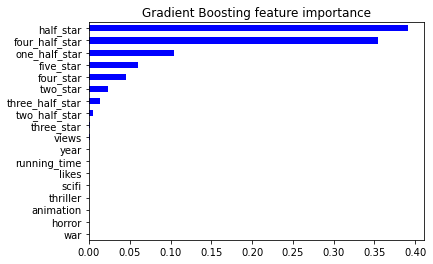

In [211]:
feat_imp = gb_reg.feature_importances_
columns = X_train_true.columns
gbGraph = pd.Series(feat_imp, columns)
print(gbGraph)
gbGraph.sort_values().plot.barh(color ='blue')
plt.title('Gradient Boosting feature importance')

In [212]:
#best model so far! great accuracy of 0.97 on test data

In [213]:
#elastic net - why would I do this when both ridge and lasso had low accuracy even compard to linear ?

In [214]:
from sklearn.linear_model import ElasticNet
net = ElasticNet()
features_cols = ['year', 'running_time', 'views', 'likes', 'half_star', 'one_half_star', 'two_star', 'two_half_star', 'three_star', 'three_half_star', 'four_star', 'four_half_star', 'five_star', 'animation', 'horror', 'scifi', 'thriller', 'war']
features = df[features_cols]
X = features
y = df['avg_rating']
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)
net.fit(X_train_true, y_train_true)
net.score(X_train_true, y_train_true)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.5714473519529, tolerance: 0.6256428119377407
  model = cd_fast.enet_coordinate_descent(


0.15726005489986938

In [215]:
net.score(X_test_true, y_test_true)

0.12730690973322223

In [216]:
y_test_pred = net.predict(X_test_true)
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.4454858154263668

In [217]:
#bad

In [218]:
# KNeighbors Regression with all numeric features

In [219]:
from sklearn.neighbors import KNeighborsRegressor
kn_reg = KNeighborsRegressor()
features_cols = ['year', 'running_time', 'views', 'likes', 'half_star', 'one_half_star', 'two_star', 'two_half_star', 'three_star', 'three_half_star', 'four_star', 'four_half_star', 'five_star', 'animation', 'horror', 'scifi', 'thriller', 'war']
features = df[features_cols]
X = features
y = df['avg_rating']
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)
kn_reg.fit(X_train_true, y_train_true)
kn_reg.score(X_train_true, y_train_true)

0.9721804843468225

In [220]:
kn_acc = kn_reg.score(X_test_true, y_test_true)
kn_acc

0.9561913345643808

In [221]:
y_test_pred = kn_reg.predict(X_test_true)
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.09981208397423476

In [222]:
# fairly good score, but now as accurate as gradient boosting

In [223]:
# decision tree regression with all features

In [224]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
features_cols = ['year', 'running_time', 'views', 'likes', 'half_star', 'one_half_star', 'two_star', 'two_half_star', 'three_star', 'three_half_star', 'four_star', 'four_half_star', 'five_star', 'animation', 'horror', 'scifi', 'thriller', 'war']
features = df[features_cols]
X = features
y = df['avg_rating']
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)
dt_reg.fit(X_train_true, y_train_true)
dt_reg.score(X_train_true, y_train_true)

1.0

In [225]:
dt_acc = dt_reg.score(X_test_true, y_test_true)
dt_acc

0.9702959072811396

In [226]:
y_test_pred = dt_reg.predict(X_test_true)
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.08218853846738991

In [227]:
# very high score as well 

In [228]:
#best models: gradient boosting, KNeighbors and Decision Tree

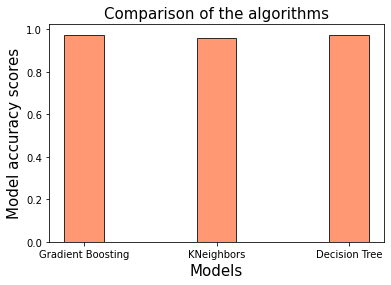

In [230]:
index_acc = ['Gradient Boosting', 'KNeighbors', 'Decision Tree']
Accuracy_score = [gb_acc,kn_acc,dt_acc]
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index_acc,Accuracy_score,color='coral',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
plt.show()